# Importing necessary libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [2]:
df = pd.read_csv("../pima-indians-diabetes_label.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# EDA - Exloratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnancies        768 non-null    int64  
 1   Glucose            768 non-null    int64  
 2   BloodPressure      768 non-null    int64  
 3   SkinThickness      768 non-null    int64  
 4   Insulin            768 non-null    int64  
 5   BMI                768 non-null    float64
 6   DiabetesPedigreeF  768 non-null    float64
 7   Age                768 non-null    int64  
 8   Outcome            768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.shape

(768, 9)

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeF,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.skew()

Pregnancies          0.901674
Glucose              0.173754
BloodPressure       -1.843608
SkinThickness        0.109372
Insulin              2.272251
BMI                 -0.428982
DiabetesPedigreeF    1.919911
Age                  1.129597
Outcome              0.635017
dtype: float64

In [7]:
df.kurt()

Pregnancies          0.159220
Glucose              0.640780
BloodPressure        5.180157
SkinThickness       -0.520072
Insulin              7.214260
BMI                  3.290443
DiabetesPedigreeF    5.594954
Age                  0.643159
Outcome             -1.600930
dtype: float64

<AxesSubplot:>

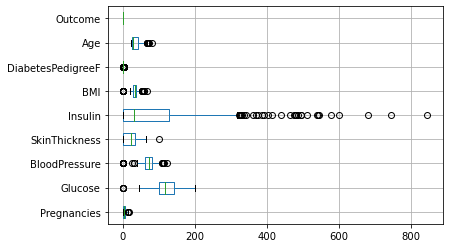

In [8]:
df.boxplot(vert=False)

# Data Preparation

In [9]:
X = df.drop("Outcome", axis=1)

In [10]:
y = df[["Outcome"]]

In [11]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeF,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [12]:
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

In [14]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeF,Age
663,9,145,80,46,130,37.9,0.637,40
712,10,129,62,36,0,41.2,0.441,38
161,7,102,74,40,105,37.2,0.204,45
509,8,120,78,0,0,25.0,0.409,64
305,2,120,76,37,105,39.7,0.215,29
...,...,...,...,...,...,...,...,...
645,2,157,74,35,440,39.4,0.134,30
715,7,187,50,33,392,33.9,0.826,34
72,13,126,90,0,0,43.4,0.583,42
235,4,171,72,0,0,43.6,0.479,26


In [15]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeF,Age
285,7,136,74,26,135,26.0,0.647,51
101,1,151,60,0,0,26.1,0.179,22
581,6,109,60,27,0,25.0,0.206,27
352,3,61,82,28,0,34.4,0.243,46
726,1,116,78,29,180,36.1,0.496,25
...,...,...,...,...,...,...,...,...
563,6,99,60,19,54,26.9,0.497,32
318,3,115,66,39,140,38.1,0.150,28
154,8,188,78,0,0,47.9,0.137,43
684,5,136,82,0,0,0.0,0.640,69


In [16]:
y_train

,Outcome
663,1
712,1
161,0
509,0
305,0
...,...
645,0
715,1
72,1
235,1


In [17]:
y_test

,Outcome
285,0
101,0
581,0
352,0
726,0
...,...
563,0
318,0
154,1
684,0


# Model Building

In [18]:
model = DecisionTreeClassifier(random_state=1)

In [19]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [20]:
y_pred = model.predict(X_test)

# Model Evaluation

In [21]:
confusion_matrix(y_test,y_pred)

array([[77, 22],
       [25, 30]], dtype=int64)

In [22]:
accuracy_score(y_test,y_pred)

0.6948051948051948

In [23]:
precision_score(y_test,y_pred)

0.5769230769230769

In [24]:
recall_score(y_test,y_pred)

0.5454545454545454

In [25]:
f1_score(y_test,y_pred)

0.5607476635514018

# Overfitting Check

In [26]:
y_train_pred = model.predict(X_train)

In [27]:
accuracy_score(y_train,y_train_pred)

1.0

* Decision Tree is an overfitting model. It basically gives good accuracy for training data and gives poor accuracy for testing data. In other terms it over fits the training data and cannot GENERALIZE the test data